In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_boston as boston
from sklearn.model_selection import train_test_split

In [405]:
boston= boston()

/home/siddharth/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [406]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [407]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [408]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [409]:
df=pd.DataFrame(boston.data)

In [410]:
df=df.rename(columns={0:"CRIM", 1:"ZN", 2:"INDUS", 3: "CHAS", 4:"NOX", 5:"RM", 6:"AGE", 7:"DIS", 8:"RAD", 9:"TAX",10:"PTRATIO",11:"B",12:"LSTAT"})

In [411]:
df["MEDV"]=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

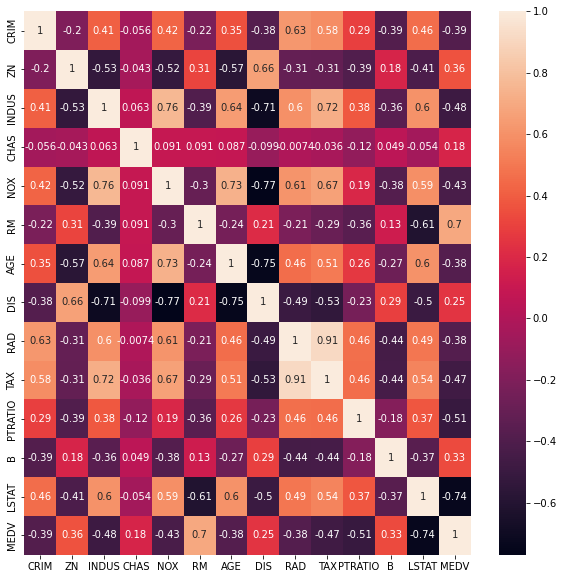

In [412]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True)

**COLUMNS RAD and TAX are strongly correlated, RAD has a higher correlation  to the dependent variable.**

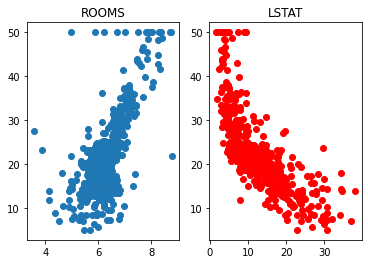

In [413]:
## RM has highest positive correlation with dependent variable:
plt.subplot(1,2,1)
plt.title("ROOMS")
plt.scatter(x=df["RM"], y=df["MEDV"])
##LSTAT has highest negative correlation with dependent variabe
plt.subplot(1,2,2)
plt.title("LSTAT")
plt.scatter(x=df["LSTAT"], y=df["MEDV"], color="red")

In [414]:
##checking relatioinship between CHAS and MEDV 
df.groupby(["CHAS"])["MEDV"].mean()

CHAS
0.0    22.093843
1.0    28.440000
Name: MEDV, dtype: float64

In [415]:
#CHECKING FOR MISSING VALUES:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:xlabel='MEDV'>

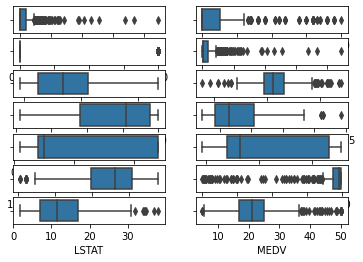

In [416]:
#CHECKING FOR OUTLIERS:
plt.subplot(7,2,1)
sns.boxplot(x=df["CRIM"])
plt.subplot(7,2,2)
sns.boxplot(x=df["ZN"])
plt.subplot(7,2,3)
sns.boxplot(x=df["CHAS"])
plt.subplot(7,2,4)
sns.boxplot(x=df["CRIM"])
plt.subplot(7,2,5)
sns.boxplot(x=df["NOX"])
plt.subplot(7,2,6)
sns.boxplot(x=df["RM"])
plt.subplot(7,2,7)
sns.boxplot(x=df["AGE"])
plt.subplot(7,2,8)
sns.boxplot(x=df["DIS"])
plt.subplot(7,2,9)
sns.boxplot(x=df["RAD"])
plt.subplot(7,2,10)
sns.boxplot(x=df["TAX"])
plt.subplot(7,2,11)
sns.boxplot(x=df["PTRATIO"])
plt.subplot(7,2,12)
sns.boxplot(x=df["B"])
plt.subplot(7,2,13)
sns.boxplot(x=df["LSTAT"])
plt.subplot(7,2,14)
sns.boxplot(x=df["MEDV"])


<AxesSubplot:xlabel='CHAS'>

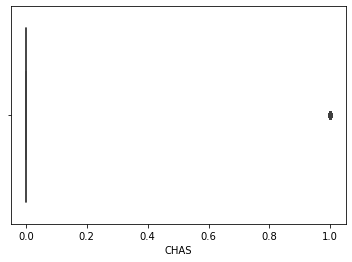

In [417]:
sns.boxplot(x=df["CHAS"])

In [418]:
df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

<AxesSubplot:xlabel='DIS'>

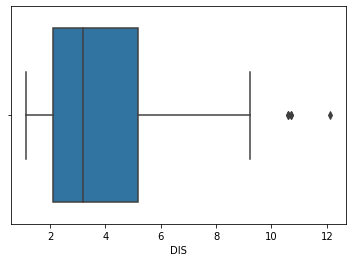

In [419]:
sns.boxplot(x=df["DIS"])

In [420]:
df["DIS"].sort_values(ascending=False).head(15)


353    12.1265
351    10.7103
352    10.7103
354    10.5857
355    10.5857
64      9.2229
255     9.2203
254     9.2203
56      9.1876
286     9.0892
252     8.9067
253     8.9067
350     8.7921
349     8.7921
55      8.6966
Name: DIS, dtype: float64

In [421]:
filter= df["DIS"]<10
dffilter=df[filter]

In [422]:
dffilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     501 non-null    float64
 1   ZN       501 non-null    float64
 2   INDUS    501 non-null    float64
 3   CHAS     501 non-null    float64
 4   NOX      501 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      501 non-null    float64
 7   DIS      501 non-null    float64
 8   RAD      501 non-null    float64
 9   TAX      501 non-null    float64
 10  PTRATIO  501 non-null    float64
 11  B        501 non-null    float64
 12  LSTAT    501 non-null    float64
 13  MEDV     501 non-null    float64
dtypes: float64(14)
memory usage: 58.7 KB


<AxesSubplot:xlabel='PTRATIO'>

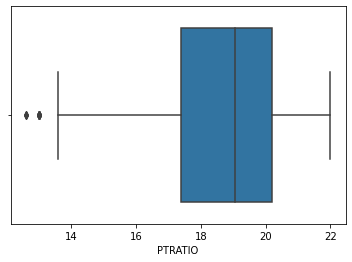

In [423]:
sns.boxplot(x=df["PTRATIO"])

In [424]:
df["PTRATIO"].sort_values(ascending=True).head(20)


197    12.6
198    12.6
196    12.6
262    13.0
261    13.0
264    13.0
265    13.0
266    13.0
263    13.0
268    13.0
260    13.0
259    13.0
258    13.0
257    13.0
267    13.0
283    13.6
195    14.4
168    14.7
154    14.7
171    14.7
Name: PTRATIO, dtype: float64

In [425]:
dffilter.isna().sum().sum()

0

In [426]:
# spliiting labeled data
x= dffilter.drop(["MEDV"], axis=1)
y=dffilter["MEDV"]

In [427]:
# train test split:
xtrain, xtest, ytrain, ytest= train_test_split(x, y)


## Linear Regression:


In [428]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
pipe= Pipeline([("sc", MinMaxScaler()),("lr", LinearRegression())])
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [429]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('sc', MinMaxScaler()), ('lr', LinearRegression())])

In [430]:
pipe.score(xtest,ytest)

0.7367496570267766

## Decision Tree regressor

In [462]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()

In [463]:
pipe5= Pipeline([("sc", MinMaxScaler()), ("dt", dt)])

In [464]:
pipe5.fit(xtrain, ytrain)

Pipeline(steps=[('sc', MinMaxScaler()), ('dt', DecisionTreeRegressor())])

In [465]:
pipe5.score(xtest, ytest)

0.8505862331991236

## Random Forest Regressor

In [466]:
from sklearn.ensemble import RandomForestRegressor

In [469]:
pipe6= Pipeline([("sc", MinMaxScaler()), ("rf", RandomForestRegressor())])

In [489]:
pipe6.fit(xtrain, ytrain)

Pipeline(steps=[('sc', MinMaxScaler()), ('rf', RandomForestRegressor())])

In [490]:
pipe6.score(xtest, ytest)

0.9012988321517839

In [491]:
y_pred=pipe6.predict(xtest)

In [508]:
mean_squared_error(ytest, y_pred)

10.274211650793644